In [1]:
import json
from PIL import Image
from pathlib import Path
import numpy as np
from collections import defaultdict

In [2]:
data_path = Path("/mnt/vol_c/data/3d-future/")

In [3]:
meta = json.loads((data_path / "meta_data/split/train_all.json").read_text())

In [4]:
meta = list(filter(lambda d: d['dataset'] == '3D-FUTURE', meta))

In [5]:
meta[0]

{'dataset': '3D-FUTURE',
 'id': '0847625f-4895-4290-a1cb-a9c795c4b53e',
 'group': '',
 'data_path': '/mnt/data/objaverse-processed/merged_for_training_final/3D-FUTURE//0847625f-4895-4290-a1cb-a9c795c4b53e.npy'}

In [6]:
for d in meta:
    d['data_path'] = d['data_path'].replace('/mnt/data/', '/mnt/vol_c/data/3d-future/')

In [7]:
meta[0]

{'dataset': '3D-FUTURE',
 'id': '0847625f-4895-4290-a1cb-a9c795c4b53e',
 'group': '',
 'data_path': '/mnt/vol_c/data/3d-future/objaverse-processed/merged_for_training_final/3D-FUTURE//0847625f-4895-4290-a1cb-a9c795c4b53e.npy'}

In [8]:
freq = defaultdict(int)
for m in meta:
    dict = np.load(m['data_path'], allow_pickle=True)[()]
    typ = dict['text'][0]
    freq[typ] += 1

freq

defaultdict(int,
            {'King-size Bed': 440,
             'Sideboard / Side Cabinet / Console': 244,
             'Dressing Chair': 75,
             'Wardrobe': 476,
             'Pendant Lamp': 1152,
             'Lounge Chair / Cafe Chair / Office Chair': 585,
             'Children Cabinet': 352,
             'L-shaped Sofa': 245,
             'Ceiling Lamp': 512,
             'Loveseat Sofa': 472,
             'Drawer Chest / Corner cabinet': 509,
             ', Modern': 991,
             'Corner/Side Table': 718,
             'Dining Table': 517,
             'armchair': 751,
             'Wine Cabinet': 114,
             'Coffee Table': 684,
             'Kids Bed': 118,
             'Dining Chair': 543,
             'Footstool / Sofastool / Bed End Stool / Stool': 570,
             'Barstool': 191,
             'Lazy Sofa': 112,
             'Round End Table': 99,
             'Three-Seat / Multi-seat Sofa': 852,
             'Bed Frame': 203,
             'Double Bed': 

In [58]:
sorted(freq.items(), key=lambda x: x[1], reverse=True)

[('Pendant Lamp', 1152),
 (', Modern', 991),
 ('Three-Seat / Multi-seat Sofa', 852),
 ('armchair', 751),
 ('Corner/Side Table', 718),
 ('Coffee Table', 684),
 ('Lounge Chair / Cafe Chair / Office Chair', 585),
 ('Footstool / Sofastool / Bed End Stool / Stool', 570),
 ('Dining Chair', 543),
 ('Nightstand', 538),
 ('TV Stand', 529),
 ('Dining Table', 517),
 ('Ceiling Lamp', 512),
 ('Drawer Chest / Corner cabinet', 509),
 ('Wardrobe', 476),
 ('Loveseat Sofa', 472),
 ('Sideboard / Side Cabinet / Console Table', 458),
 ('King-size Bed', 440),
 ('Bookcase / jewelry Armoire', 439),
 ('Desk', 356),
 ('Children Cabinet', 352),
 ('Lounge Chair / Book-chair / Computer Chair', 325),
 ('Shelf', 275),
 ('Floor Lamp', 252),
 ('L-shaped Sofa', 245),
 ('Sideboard / Side Cabinet / Console', 244),
 (', Others', 205),
 ('Bed Frame', 203),
 ('Barstool', 191),
 ('Dressing Table', 142),
 ('Double Bed', 141),
 ('Single bed', 135),
 ('Three-Seat / Multi-person sofa', 129),
 ('Tea Table', 120),
 ('Kids Bed', 11

In [9]:
data = []
for m in meta:
    dict = np.load(m['data_path'], allow_pickle=True)[()]
    data.append(dict)

len(data)

16563

In [10]:
ct = list(filter(lambda x: x['text'][0] == 'Coffee Table', data))

In [11]:
path = data_path / ct[0]['id'] / 'colors_4.png'
image = np.array(Image.open(path))

In [19]:
image.shape

(336, 336, 4)

In [12]:
import matplotlib.pyplot as plt

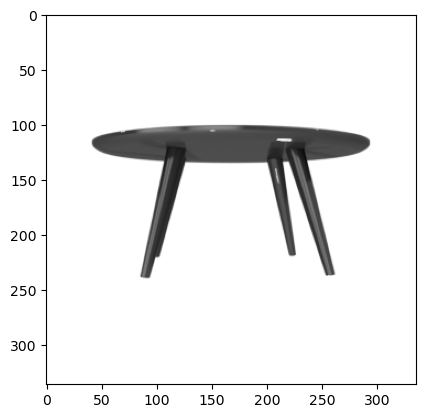

In [13]:
plt.imshow(image)

In [22]:
mask = (image[:, :, 3] > 0).astype(int)

In [26]:
np.count_nonzero(mask)

12043